<a href="https://colab.research.google.com/github/Bluelord/EE524/blob/assignments/Assignment5/NileshGupta_206102031/EE524_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EE524 Introduction to Machine Learning Lab**

Name: **Nilesh Gupta**, Ph.D. EEE Department. 

Roll No. **206102031**

In [7]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**K Nearest Neighbours Algorithm:**



In [45]:
#Loading iris the Data from the mounted drive
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
Data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datafiles/iris.data', names = names)

# Dividing Featurs and Targets labels 
X = Data.drop('class', axis = 1)
y = np.array(Data.iloc[:,-1])
# Have a look on our data
Data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Normalization of ratings means adjusting values measured on different scales to a common scale, The goal of normalization is to make every datapoint have the same scale so each feature is equally important.

Here we are using Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1. Min-max normalization has one fairly significant downside: it does not handle outliers very well.

$$x' = \frac{(x - min(x)) * ( new_{max} - new_{min})}{max(x) - min(x)} - new_{min}$$

for range $[0,1]$, normalized values is $x' = \frac{x - min(x)}{max(x) - min(x)}$

In [46]:
# Preprocessing
minmax = MinMaxScaler()
X = minmax.fit_transform(X)
# Encoding classes as "Iris-setosa:0, Iris_versicolor:1, Iris-virginica:2
#encoder = LabelEncoder()
#y = encoder.fit_transform(y)
y = np.reshape(y,(-1,1))

training_Data = np.append(X, y, axis=1)

**Euclidean Distance**

Calculating the straight line distance between two vectors using the Euclidean distance measure, it is calculated as:
$$\sqrt{\sum \limits_{i=1}^k (x_i - y_i)^2}$$

In [47]:
# Calculating the Euclidean distance between two vectors
def euclidean(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return np.sqrt(distance)

In [48]:
# Finding the Nearest neighbors
def nearest_neighbors(train, test_row, k):
	distances = []
	for train_row in train:
		dist = euclidean(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda x: x[1]) #sorting the list by the distance
 # Retrieving the k nearest neighbors.
	neighbors = []
	for i in range(k):
		neighbors.append(distances[i][0])
	return neighbors

In [49]:
# kNN Algorithm
def k_nearest_neighbors(train,test, k):
	predictions = []
	for row in test:
		output = predict(X_train, row, k)
		predictions.append(output)
	return(predictions)

In [50]:
# Make a classification prediction with neighbors
def predict_class(train, test, k):
	neighbors = nearest_neighbors(train, test, k)
	output = [row[-1] for row in neighbors]
	prediction = max(set(output), key=output.count)
	return prediction

def predict(xtrain,x,k):
    predict_val=[predict_class(xtrain,i,k) for i in x]
    return predict_val

In [55]:
# Defining the parameter
k = 5 
xtest=[[5.1,2.5,3.2,4.3],
       [4.9,3,1.4,.2],
       [6,3,4.8,1.8]]
# normalizing the test set
xtest = minmax.transform(xtest)
# making prediction
predictions=predict(training_Data,xtest,5)
print(predictions)

['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']


**K Means Algorithm:**



In [173]:
#Loading iris the Data from the mounted drive
names = ['feature_1', 'feature_2']
Data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datafiles/dataset.csv', names = names)
X = np.array(Data[1:])

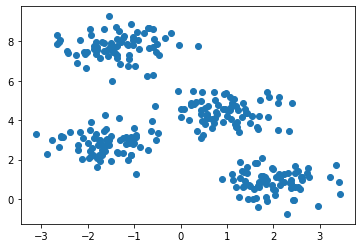

In [174]:
# Plotting The dataset
plt.scatter(X[:,0:1],X[:,1:2])
plt.show()

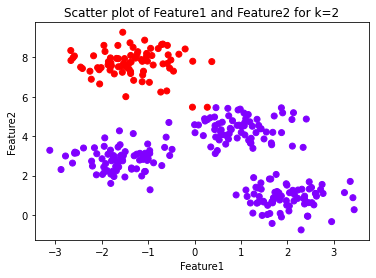

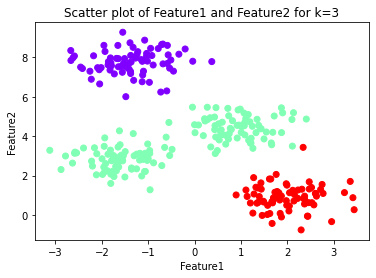

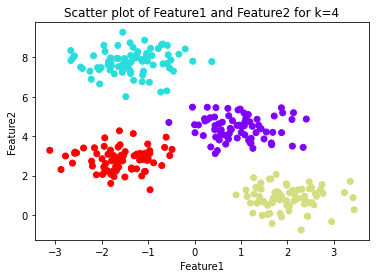

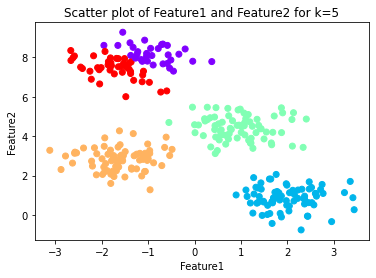

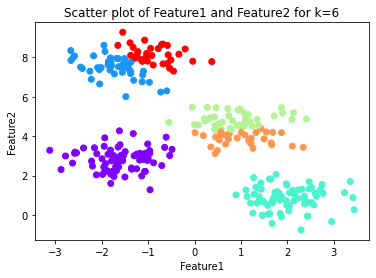

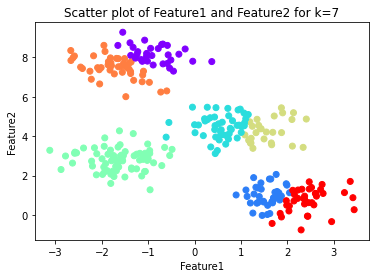

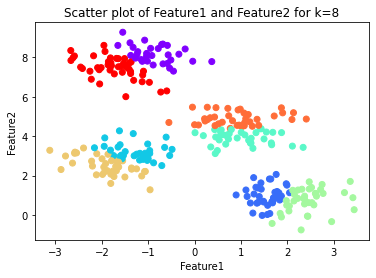

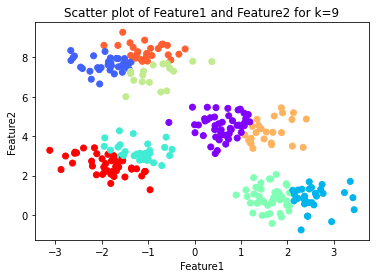

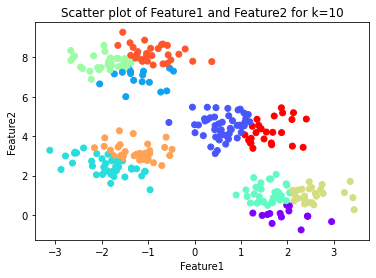

In [177]:
# Vary k from 2 to 10 and plotting the clusters
for k in range(2,11):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(X)
  plt.figure(k)
  plt.scatter(X[:,0:1],X[:,1:2], c=kmeans.labels_, cmap='rainbow')
  plt.xlabel('Feature1')
  plt.ylabel('Feature2')
  str1 = 'Scatter plot of Feature1 and Feature2 for k=' + str(k) 
  plt.title(str1)
plt.show()